## Overview

1. Correlation plot
2. Scatter plot
3. Histogram
4. Bar Chart
5. Pie Chart
6. Outlier Detection
7. Box-Plot
8. Subplot
9. Multivariate plotting
10. Grouped box-plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

###  Prepare sample dataset

In [4]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))

df_wine.head()


### Train Test split

from sklearn.model_selection import train_test_split

X = df_wine.drop(['Class label'],axis = 1)
y = df_wine[['Class label']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
X_train.head()

Class labels [1 2 3]


Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
161    13.69        3.26  2.54               20.0        107           1.83   
92     12.69        1.53  2.26               20.7         80           1.38   
94     11.62        1.99  2.28               18.0         98           3.02   
174    13.40        3.91  2.48               23.0        102           1.80   
24     13.50        1.81  2.61               20.0         96           2.53   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
161        0.56                  0.50             0.80             5.88  0.96   
92         1.46                  0.58             1.62             3.05  0.96   
94         2.26                  0.17             1.35             3.25  1.16   
174        0.75                  0.43             1.41             7.30  0.70   
24         2.61                  0.28             1.66             3.52  1.12   

     OD280/OD315 of diluted wines  Proline  
161                          1.82      680  
92                           2.06      495  
94                           2.96      345  
174                          1.56      750  
24                           3.82      845

## Correlation plot

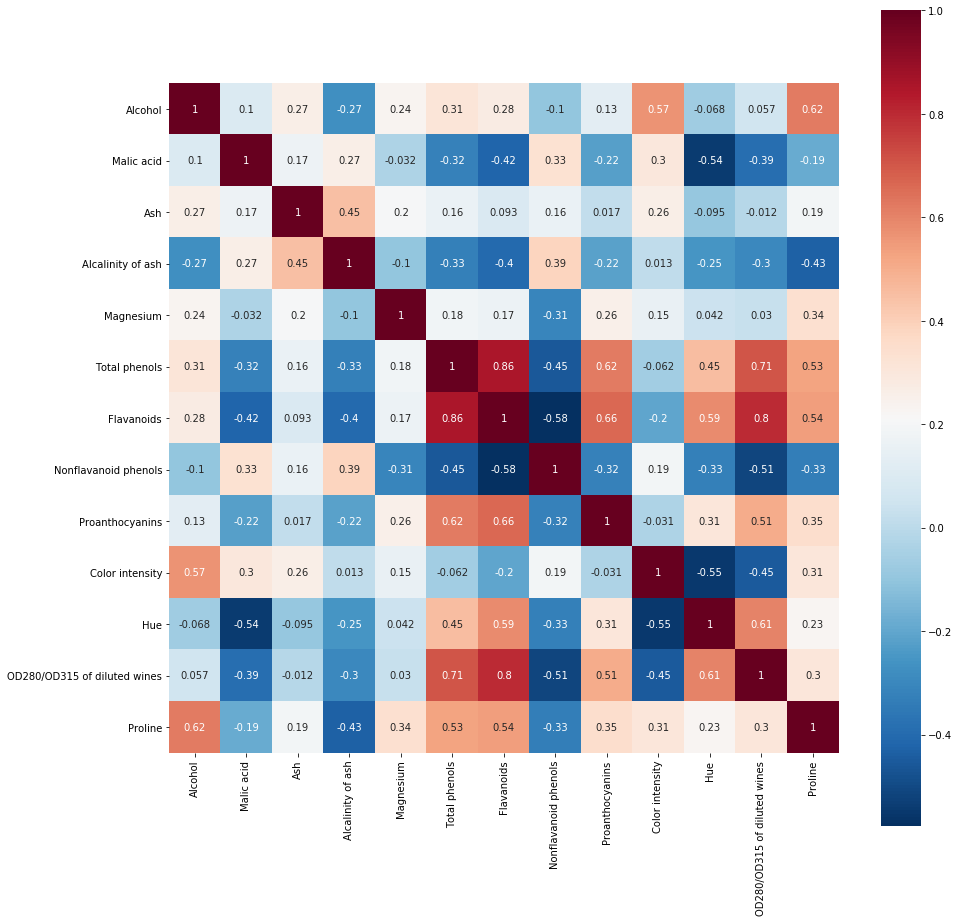

In [5]:
corr = X_train.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr,square = True,annot = True,cmap = 'RdBu_r')

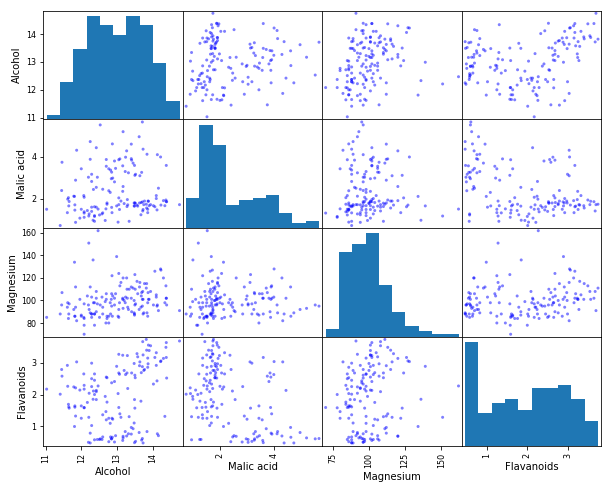

In [9]:
from pandas.plotting import scatter_matrix

scatter_matrix(X_train[['Alcohol','Malic acid','Magnesium','Flavanoids']],figsize = (10,8),c = 'blue')
plt.show()

## scatter plot

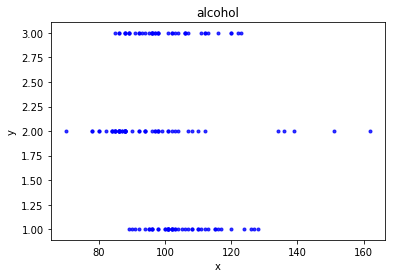

In [10]:
plt.scatter(x = X_train['Magnesium'],y = y_train,c = 'blue',alpha = 0.8,marker = '.')
plt.title('alcohol')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Histogram

- Used for interval data

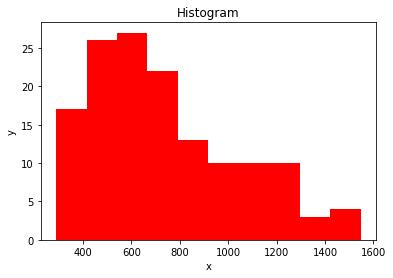

In [11]:
plt.hist(X_train['Proline'],color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram')
plt.show()

## line Chart

- rely heavily on index

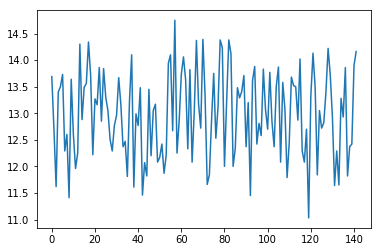

In [12]:
X_train = X_train.reset_index()
X_train.drop(['index'],axis = 1)
plt.plot(X_train['Alcohol'])


## Value counts -- Bar chart for categorical data

- Used for categorical
- 計算類別個數
- Bar chart with ratio


- sort_index >> 按順序排列

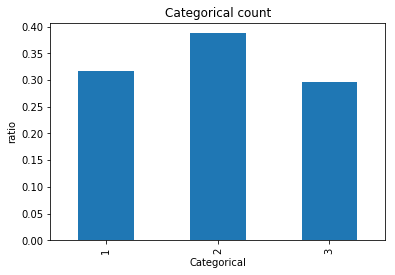

In [14]:
plt.figure()
(y_train['Class label'].value_counts().sort_index()/len(y_train['Class label'])).plot(kind = 'bar')
plt.xlabel('Categorical')
plt.ylabel('ratio')
plt.title('Categorical count')
plt.show()

## Pie chart


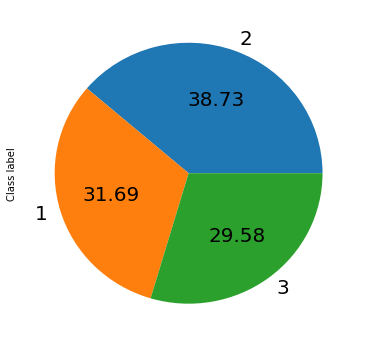

In [15]:
plt.figure()
y_train['Class label'].value_counts().plot(kind = 'pie',autopct = '%.2f',fontsize = 20,figsize = (6,6))
plt.show()

## Outlier Detection

- Define by IQR

In [17]:
IQR = np.percentile(X_train['Magnesium'],75)-np.percentile(X_train['Magnesium'],25)

X_train[(X_train['Magnesium'] < np.percentile(X_train['Magnesium'],25)-1.5*IQR) |
        (X_train['Magnesium'] > np.percentile(X_train['Magnesium'],75)+1.5*IQR)]

index  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
34     95    12.47        1.52  2.20               19.0        162   
35     96    11.81        2.12  2.74               21.5        134   
39     73    12.99        1.67  2.60               30.0        139   
53     69    12.21        1.19  1.75               16.8        151   
63     78    12.33        0.99  1.95               14.8        136   

    Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
34           2.50        2.27                  0.32             3.28   
35           1.60        0.99                  0.14             1.56   
39           3.30        2.89                  0.21             1.96   
53           1.85        1.28                  0.14             2.50   
63           1.90        1.85                  0.35             2.76   

    Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
34             2.60  1.16                          2.63      937  
35             2.50  0.95                          2.26      625  
39             3.35  1.31                          3.50      985  
53             2.85  1.28                          3.07      718  
63             3.40  1.06                          2.31      750

## Box-Plot

#### Take Magnesium as example

###### plt.plot(x,notch,sym,vert)
- Basic box plot
- box plot with outliers
- Horizontal
- Boxplot in same figure
- subplot version

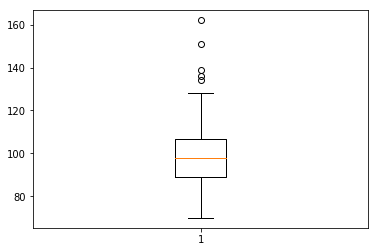

In [18]:
## Basic box plot

plt.boxplot(X_train['Magnesium'])
plt.show()

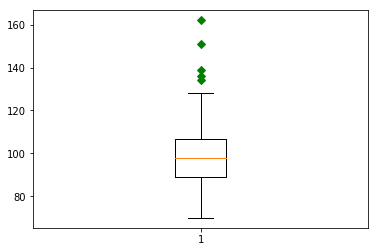

In [19]:
## Box plot with outlier

plt.figure()
plt.boxplot(X_train['Magnesium'],0,'gD')
plt.show()

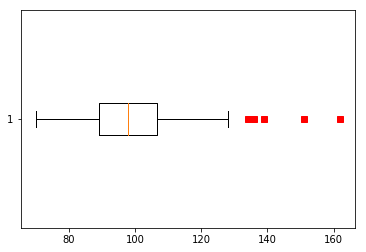

In [20]:
### Horizontal Boxes

plt.figure()
plt.boxplot(X_train['Magnesium'],0,'rs',0)
plt.show()

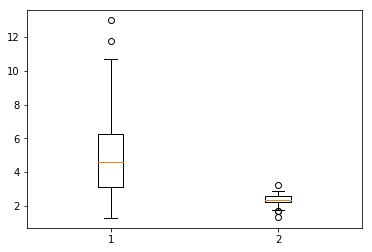

In [23]:
data = [X_train['Color intensity'],X_train['Ash']]

plt.figure()
plt.boxplot(data)
plt.show()

## Subplot -1

Rules  >> (rows, columns)

Text(0.5,1,'Ash')

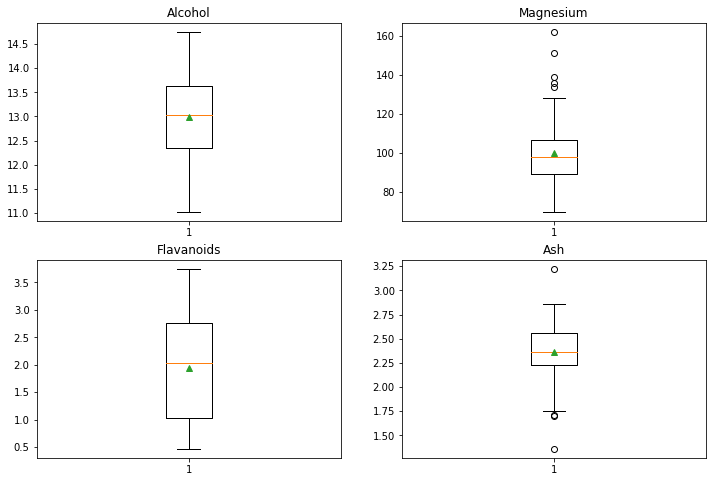

In [24]:
fig,axarr = plt.subplots(2,2,figsize = (12,8))

axarr[0,0].boxplot(X_train['Alcohol'],showmeans = True)
axarr[0,0].set_title('Alcohol')

axarr[0,1].boxplot(X_train['Magnesium'],showmeans = True)
axarr[0,1].set_title('Magnesium')

axarr[1,0].boxplot(X_train['Flavanoids'],showmeans = True)
axarr[1,0].set_title('Flavanoids')

axarr[1,1].boxplot(X_train['Ash'],showmeans = True)
axarr[1,1].set_title('Ash')

## Subplot -2

Text(0.5,1,'Alcohol')

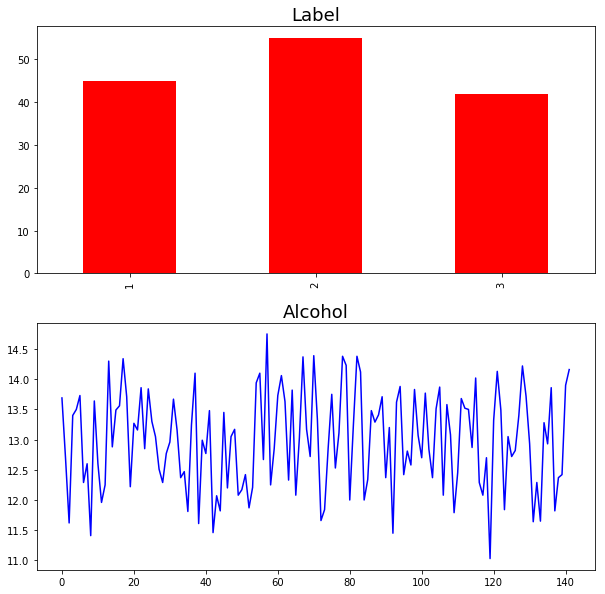

In [25]:
fig, axarr = plt.subplots(2, 1, figsize=(10, 10))

y_train['Class label'].value_counts().sort_index().plot(kind='bar'
                                                        ,color ='red'
                                                        ,ax = axarr[0])

axarr[0].set_title("Label", fontsize=18)


X_train['Alcohol'].plot(kind = 'line',ax = axarr[1],color = 'blue')

axarr[1].set_title("Alcohol", fontsize=18)

## Multivariate plotting

In [26]:
import pandas as pd
pd.set_option('max_columns', None)
df = pd.read_csv("data/CompleteDataset.csv", index_col=0)

import re
import numpy as np

footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

footballers.head()

Name  Age                                            Photo  \
0  Cristiano Ronaldo   32   https://cdn.sofifa.org/48/18/players/20801.png   
1           L. Messi   30  https://cdn.sofifa.org/48/18/players/158023.png   
2             Neymar   25  https://cdn.sofifa.org/48/18/players/190871.png   
3          L. Suárez   30  https://cdn.sofifa.org/48/18/players/176580.png   
4           M. Neuer   31  https://cdn.sofifa.org/48/18/players/167495.png   

  Nationality                                 Flag  Overall  Potential  \
0    Portugal  https://cdn.sofifa.org/flags/38.png       94         94   
1   Argentina  https://cdn.sofifa.org/flags/52.png       93         93   
2      Brazil  https://cdn.sofifa.org/flags/54.png       92         94   
3     Uruguay  https://cdn.sofifa.org/flags/60.png       92         92   
4     Germany  https://cdn.sofifa.org/flags/21.png       92         92   

                  Club                                   Club Logo  Value  \
0       Real Madrid CF  https://cdn.sofifa.org/24/18/teams/243.png   95.5   
1         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png  105.0   
2  Paris Saint-Germain   https://cdn.sofifa.org/24/18/teams/73.png  123.0   
3         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png   97.0   
4     FC Bayern Munich   https://cdn.sofifa.org/24/18/teams/21.png   61.0   

    Wage  Special Acceleration Aggression Agility Balance Ball control  \
0  €565K     2228           89         63      89      63           93   
1  €565K     2154           92         48      90      95           95   
2  €280K     2100           94         56      96      82           95   
3  €510K     2291           88         78      86      60           91   
4  €230K     1493           58         29      52      35           48   

  Composure Crossing Curve Dribbling Finishing Free kick accuracy GK diving  \
0        95       85    81        91        94                 76         7   
1        96       77    89        97        95                 90         6   
2        92       75    81        96        89                 84         9   
3        83       77    86        86        94                 84        27   
4        70       15    14        30        13                 11        91   

  GK handling GK kicking GK positioning GK reflexes Heading accuracy  \
0          11         15             14          11               88   
1          11         15             14           8               71   
2           9         15             15          11               62   
3          25         31             33          37               77   
4          90         95             91          89               25   

  Interceptions Jumping Long passing Long shots Marking Penalties Positioning  \
0            29      95           77         92      22        85          95   
1            22      68           87         88      13        74          93   
2            36      61           75         77      21        81          90   
3            41      69           64         86      30        85          92   
4            30      78           59         16      10        47          12   

  Reactions Short passing Shot power Sliding tackle Sprint speed Stamina  \
0        96            83         94             23           91      92   
1        95            88         85             26           87      73   
2        88            81         80             33           90      78   
3        93            83         87             38           77      89   
4        85            55         25             11           61      44   

  Standing tackle Strength Vision Volleys   CAM    CB   CDM    CF    CM  \
0              31       80     85      88  89.0  53.0  62.0  91.0  82.0   
1              28       59     90      85  92.0  45.0  59.0  92.0  84.0   
2              24       53     80      83  88.0  46.0  59.0  88.0  79.0   
3              45       80     84      88 

## Multivariate scatter plot

<Figure size 432x288 with 0 Axes>

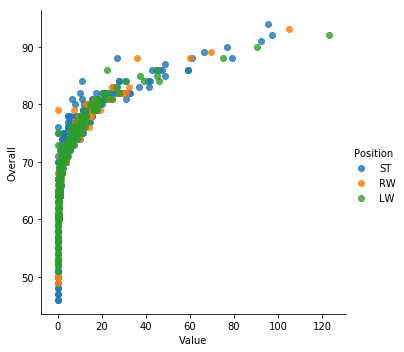

In [27]:
import seaborn as sns

plt.figure()
sns.lmplot(x = 'Value', y = 'Overall',hue ='Position',
          data = footballers.loc[footballers['Position'].isin(['ST','RW','LW'])],
          fit_reg = False)
plt.show()

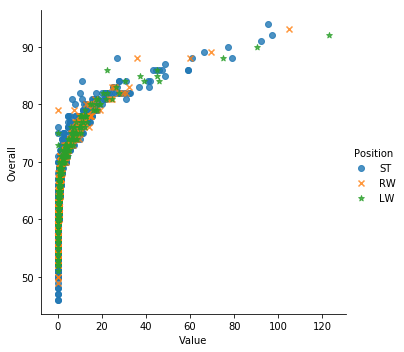

In [28]:
sns.lmplot(x = 'Value', y='Overall', markers = ['o','x','*'],hue= 'Position',
          data = footballers.loc[footballers['Position'].isin(['ST','RW','LW'])],
          fit_reg = False)

## Grouped box-plot

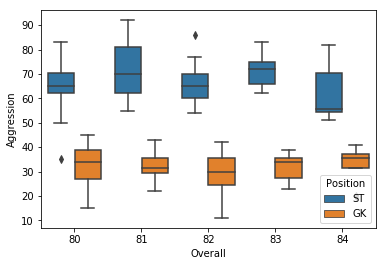

In [29]:
f = (footballers.loc[footballers['Position'].isin(['ST','GK'])]
                .loc[:,['Value','Overall','Aggression','Position']])

f = f[f["Overall"]>=80]
f = f[f["Overall"] <85]

f['Aggression'] = f['Aggression'].astype(float)

sns.boxplot(x = "Overall", y = "Aggression", hue = "Position", data = f)